In [ ]:
import sys

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates, andrews_curves, radviz, scatter_matrix
import seaborn as sns

import sklearn
from scipy import stats

from IPython.display import set_matplotlib_formats
matplotlib.style.use('ggplot') # Other styles matplotlib.style.available
import os
from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline
sns.set_context('notebook')
plt.close('all')

In [1]:
import numpy as np

# Set the seed for reproducibility
np.random.seed(0)

# Given dataset
data = np.array([34, 58, 42, 65, 25, 73, 40, 60, 29, 51, 76, 38])

# Null hypothesis (H0): Population mean is equal to 50
# Alternative hypothesis (H1): Population mean is not equal to 50
# Observed sample mean
observed_mean = np.mean(data)

# Number of bootstrap samples
num_samples = 2000

# Initialize array to store p-values
p_values = np.zeros(num_samples)

# Bootstrap sampling and hypothesis testing
for i in range(num_samples):
    # Generate bootstrap sample
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    # Calculate the mean of the bootstrap sample
    bootstrap_mean = np.mean(bootstrap_sample)
    # Calculate the p-value
    p_value = 2 * min(np.mean(bootstrap_sample >= observed_mean), np.mean(bootstrap_sample <= observed_mean))
    # Store the p-value
    p_values[i] = p_value

# Calculate the average p-value
average_p_value = np.mean(p_values)

print("Average p-value obtained from 2000 bootstrap samples:", average_p_value)


Average p-value obtained from 2000 bootstrap samples: 0.76825


In [2]:
import numpy as np

# Set the seed for reproducibility
np.random.seed(0)

# Given dataset
data = np.array([65, 23, 28, 35, 42, 49, 55, 63, 70, 47])

# Null hypothesis (H0): Population variance is equal to 300
# Alternative hypothesis (H1): Population variance is not equal to 300
# Observed sample variance
observed_variance = np.var(data, ddof=1)  # ddof=1 for unbiased estimation

# Number of bootstrap samples
num_samples = 1500

# Initialize array to store p-values
p_values = np.zeros(num_samples)

# Bootstrap sampling and hypothesis testing
for i in range(num_samples):
    # Generate bootstrap sample
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    # Calculate the variance of the bootstrap sample
    bootstrap_variance = np.var(bootstrap_sample, ddof=1)  # ddof=1 for unbiased estimation
    # Calculate the p-value
    p_value = 2 * min(np.mean(bootstrap_variance >= observed_variance), np.mean(bootstrap_variance <= observed_variance))
    # Store the p-value
    p_values[i] = p_value

# Calculate the average p-value
average_p_value = np.mean(p_values)

print("Average p-value obtained from 1500 bootstrap samples:", average_p_value)


Average p-value obtained from 1500 bootstrap samples: 0.0


In [3]:
import numpy as np

# Set the seed for reproducibility
np.random.seed(0)

# Given datasets
group1 = np.array([23, 28, 32, 37, 44, 49, 55, 61, 70, 78])
group2 = np.array([90, 35, 42, 48, 53, 59, 64, 72, 79, 85])

# Null hypothesis (H0): Means of the two groups are equal
# Alternative hypothesis (H1): Means of the two groups are not equal
# Observed difference in means
observed_diff_means = np.mean(group1) - np.mean(group2)

# Number of bootstrap samples
num_samples = 2000

# Initialize array to store p-values
p_values = np.zeros(num_samples)

# Bootstrap sampling and hypothesis testing
for i in range(num_samples):
    # Generate bootstrap samples for each group
    bootstrap_sample1 = np.random.choice(group1, size=len(group1), replace=True)
    bootstrap_sample2 = np.random.choice(group2, size=len(group2), replace=True)
    # Calculate the difference in means for the bootstrap samples
    bootstrap_diff_means = np.mean(bootstrap_sample1) - np.mean(bootstrap_sample2)
    # Calculate the p-value
    p_value = 2 * min(np.mean(bootstrap_diff_means >= observed_diff_means), np.mean(bootstrap_diff_means <= observed_diff_means))
    # Store the p-value
    p_values[i] = p_value

# Calculate the average p-value
average_p_value = np.mean(p_values)

print("Average p-value obtained from 2000 bootstrap samples:", average_p_value)


Average p-value obtained from 2000 bootstrap samples: 0.008


example 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import seaborn as sns
import numpy as np

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ADSExperiments/daily-total-births.csv')

In [ ]:
df

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [ ]:
import pandas as pd

series =pd.read_csv('/content/drive/MyDrive/ADSExperiments/daily-total-births.csv', header=0, index_col=0)

            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44


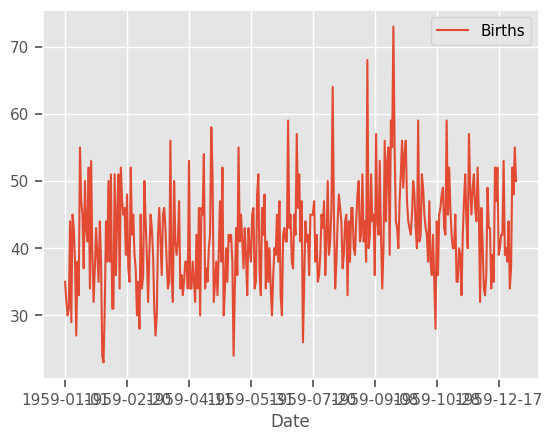

In [ ]:
print(series.head())
series.plot()
plt.show()

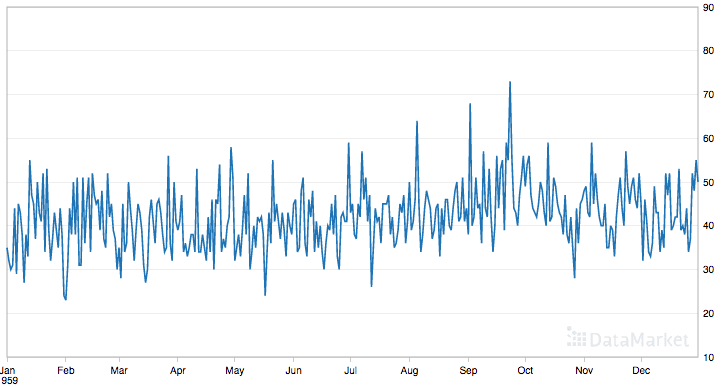

Moving Average as Data Preparation
Moving average can be used as a data preparation technique to create a smoothed version of the original dataset.

Smoothing is useful as a data preparation technique as it can reduce the random variation in the observations and better expose the structure of the underlying causal processes.

The rolling() function on the Series Pandas object will automatically group observations into a window. You can specify the window size, and by default a trailing window is created. Once the window is created, we can take the mean value, and this is our transformed dataset.

New observations in the future can be just as easily transformed by keeping the raw values for the last few observations and updating a new average value.

To make this concrete, with a window size of 3, the transformed value at time (t) is calculated as the mean value for the previous 3 observations (t-2, t-1, t), as follows:

               Births
Date                 
1959-01-01        NaN
1959-01-02        NaN
1959-01-03  32.333333
1959-01-04  31.000000
1959-01-05  35.000000
1959-01-06  34.666667
1959-01-07  39.333333
1959-01-08  39.000000
1959-01-09  42.000000
1959-01-10  36.000000


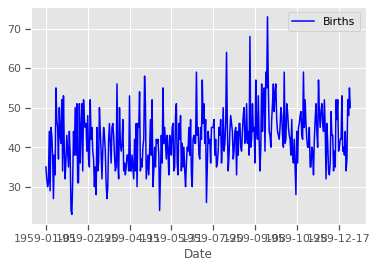

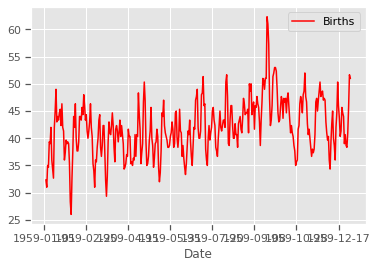

In [ ]:

rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
series.plot(color='blue')
rolling_mean.plot(color='red')
pyplot.show()

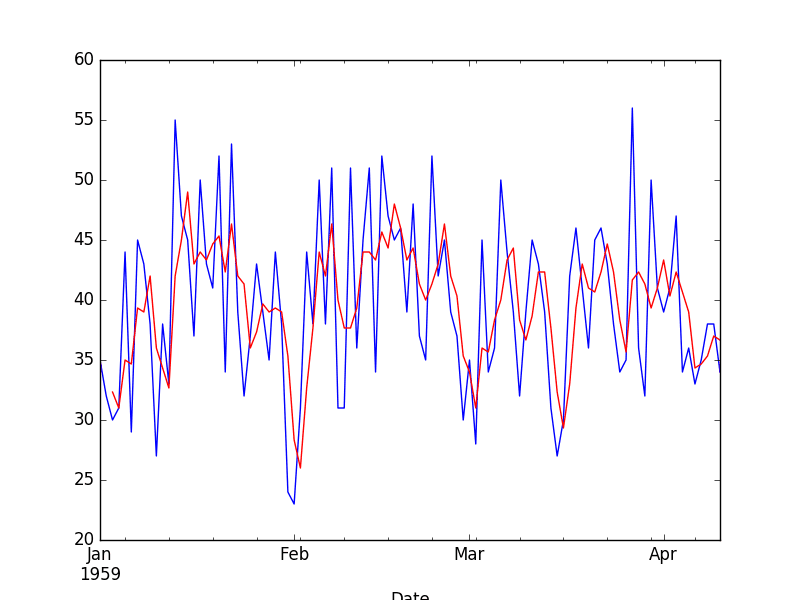

Here, you can clearly see the lag in the transformed dataset.

Next, let’s take a look at using the moving average as a feature engineering method.

To get a better idea of the effect of the transform, we can zoom in and plot the first 100 observations.

Below is an example of including the moving average of the previous 3 values as a new feature, as wellas a lag-1 input feature for the Daily  Births dataset.

In [ ]:

from pandas import DataFrame
from pandas import concat

df = DataFrame(series.values)
width = 3
lag1 = df.shift(1)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = concat([means, lag1, df], axis=1)
dataframe.columns = ['mean', 't-1', 't+1']
print(dataframe.head(10))

        mean   t-1  t+1
0        NaN   NaN   35
1        NaN  35.0   32
2        NaN  32.0   30
3        NaN  30.0   31
4  32.333333  31.0   44
5  31.000000  44.0   29
6  35.000000  29.0   45
7  34.666667  45.0   43
8  39.333333  43.0   38
9  39.000000  38.0   27


Moving Average as Prediction
The moving average value can also be used directly to make predictions.

It is a naive model and assumes that the trend and seasonality components of the time series have already been removed or adjusted for.

The moving average model for predictions can easily be used in a walk-forward manner. As new observations are made available (e.g. daily), the model can be updated and a prediction made for the next day.

predicted=32.333333, expected=31.000000
predicted=31.000000, expected=44.000000
predicted=35.000000, expected=29.000000
predicted=34.666667, expected=45.000000
predicted=39.333333, expected=43.000000
predicted=39.000000, expected=38.000000
predicted=42.000000, expected=27.000000
predicted=36.000000, expected=38.000000
predicted=34.333333, expected=33.000000
predicted=32.666667, expected=55.000000
predicted=42.000000, expected=47.000000
predicted=45.000000, expected=45.000000
predicted=49.000000, expected=37.000000
predicted=43.000000, expected=50.000000
predicted=44.000000, expected=43.000000
predicted=43.333333, expected=41.000000
predicted=44.666667, expected=52.000000
predicted=45.333333, expected=34.000000
predicted=42.333333, expected=53.000000
predicted=46.333333, expected=39.000000
predicted=42.000000, expected=32.000000
predicted=41.333333, expected=37.000000
predicted=36.000000, expected=43.000000
predicted=37.333333, expected=39.000000
predicted=39.666667, expected=35.000000


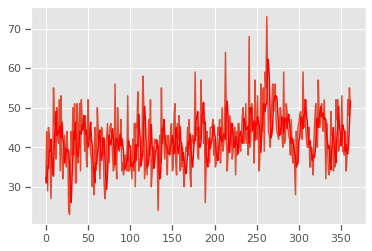

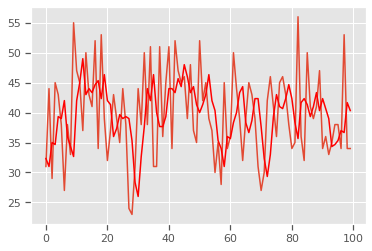

In [ ]:
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

# prepare situation
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = mean([history[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[0:100])
pyplot.plot(predictions[0:100], color='red')
pyplot.show()

https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/

    0
0  35
1  32
2  30
3  31
4  44


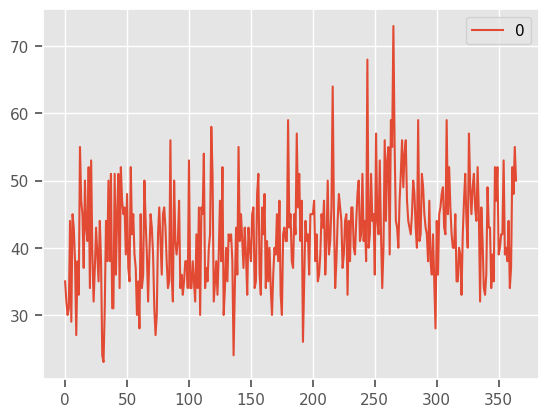

In [ ]:
from pandas import read_csv
from matplotlib import pyplot

print(df.head())
df.plot()
pyplot.show()

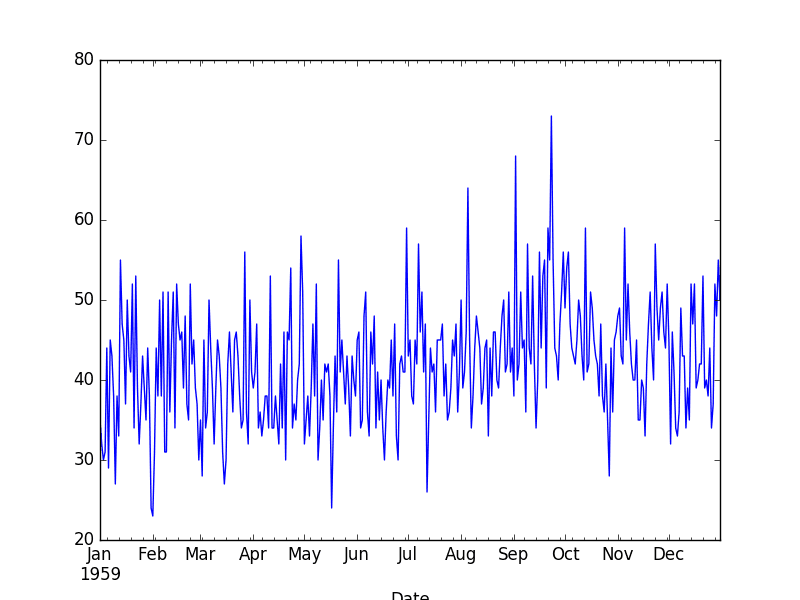

Example 2

---



<ipython-input-3-7b586a1c5de5>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
<ipython-input-3-7b586a1c5de5>:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('/content/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


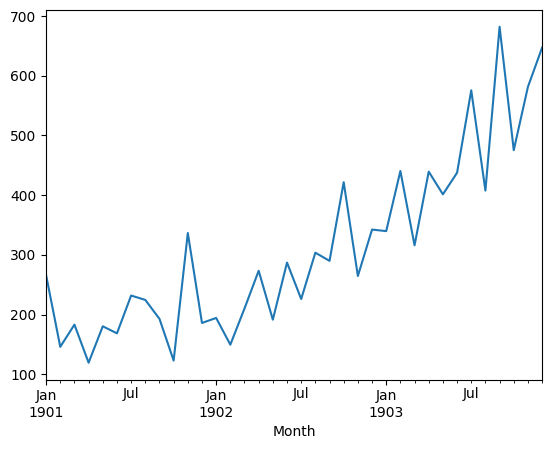

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('/content/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

We can see that the Shampoo Sales dataset has a clear trend. This suggests that the time series is not stationary and will require differencing to make it stationary, at least a difference order of 1.

Pandas offers a built-in capability to plot autocorrelations. The following example showcases the autocorrelation for an extensive set of time series lags: **bold text**

<ipython-input-6-9604d4799728>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
<ipython-input-6-9604d4799728>:9: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('/content/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


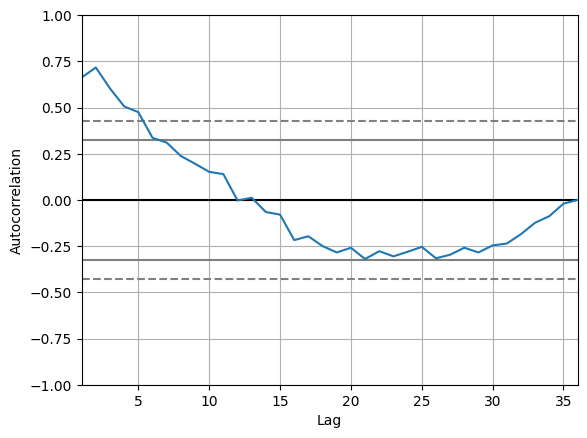

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('/content/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
autocorrelation_plot(series)
pyplot.show()

In [ ]:
series

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales, dtype: float64

Building an ARIMA Model: A Step-by-Step Guide:

Model Definition: Initialize the ARIMA model by invoking ARIMA() and specifying the p, d, and q parameters.
Model Training: Train the model on your dataset using the fit() method.
Making Predictions: Generate forecasts by utilizing the predict() function and designating the desired time index or indices.

<ipython-input-8-57d78217696f>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
<ipython-input-8-57d78217696f>:10: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('/content/shampoo.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Tue, 19 Mar 2024   AIC                            408.969
Time:                        08:11:23   BIC                            418.301
Sample:                    01-31-1901   HQIC                           412.191
                         - 12-31-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

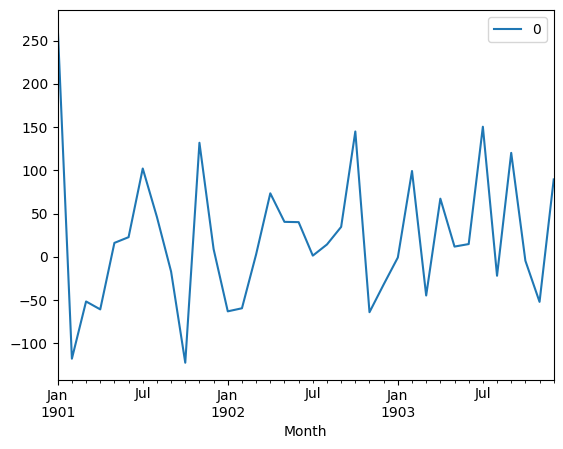

                0
count   36.000000
mean    21.936144
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000


In [ ]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('/content/shampoo.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

# summary stats of residuals
print(residuals.describe())

<ipython-input-9-1bdcbed1ad2b>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
<ipython-input-9-1bdcbed1ad2b>:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('/content/shampoo.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)


predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220221, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231275, expected=475.300000
predicted=672.914944, expected=581.300000
predicted=531.541449, expected=646.900000
Test RMSE: 89.021


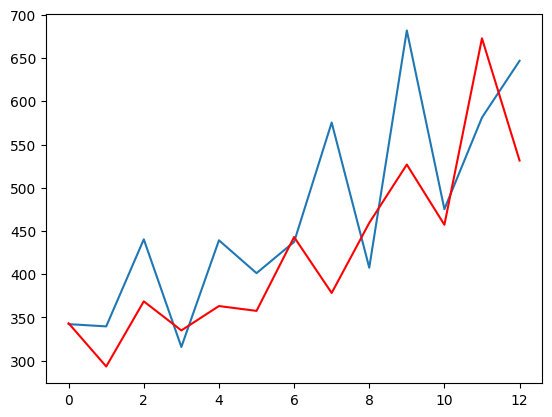

In [ ]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('/content/shampoo.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()